In [66]:
set.seed(3938425)

In [67]:
install.packages("IRdisplay")
install.packages("htmlwidgets")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [68]:
library(IRdisplay)
library(htmlwidgets)
library(ggplot2)


In [69]:
library(mgcv)

In [70]:
sample.data = readRDS("bike_dat.Rdata")


In [71]:
train_indices <- sample(nrow(sample.data), 200)

In [72]:
train_data <- sample.data[-train_indices, ]
test_data <- sample.data[train_indices, ]

In [73]:
# Fit a GAM model
gam_model <- gam(counts ~ High.Temp + Low.Temp + snow + prec + rain + month + s(Date, bs = "re"), data = train_data, method = "REML")



In [74]:
summary(gam_model)


Family: gaussian 
Link function: identity 

Formula:
counts ~ High.Temp + Low.Temp + snow + prec + rain + month + 
    s(Date, bs = "re")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   728.44     589.75   1.235  0.21727    
High.Temp      70.64      16.31   4.332 1.74e-05 ***
Low.Temp      -21.04      19.76  -1.065  0.28744    
snowyes     -1441.06    1097.83  -1.313  0.18982    
prec        -1312.58     333.99  -3.930 9.52e-05 ***
rainyes      -768.85     188.58  -4.077 5.20e-05 ***
monthAug      185.37     399.84   0.464  0.64310    
monthJul      313.69     401.36   0.782  0.43479    
monthJun      936.75     347.18   2.698  0.00718 ** 
monthMay      306.29     296.11   1.034  0.30139    
monthOct      297.15     290.45   1.023  0.30671    
monthSep      581.14     358.69   1.620  0.10574    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
          edf Ref.df     F  p-value 

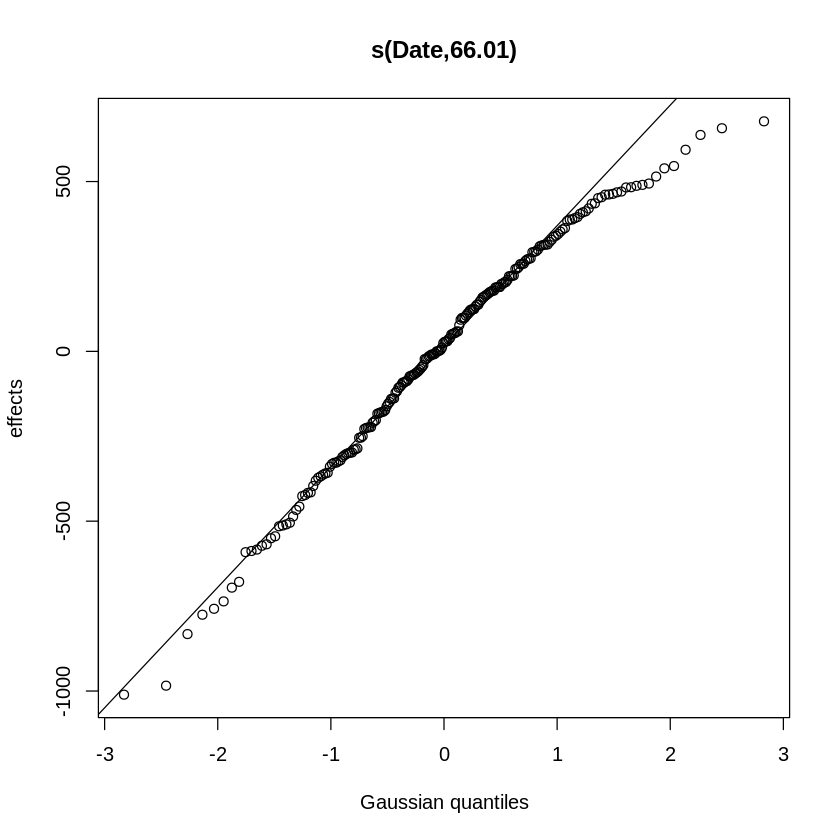

In [75]:
plot(gam_model, select = 1)

# **B**

Q) In which month and on which weekday are New York bridges most (least) busy with cyclists?

Ans:- From the coefficients, we can observe that August, July, and May have lower coefficients compared to other months, suggesting relatively lower cyclist counts in these months.

Q) Do snow days yield different cyclist counts than dry days? Than rain days?

Ans:- The coefficient for snow represents the effect of snow days on cyclist counts compared to dry days. From output, the coefficient for "snowyes" is -1385.41.
A negative coefficient suggests that snow days are associated with lower cyclist counts compared to dry days.

Ans:- The coefficient for rain shows the effect of rain on cyclist counts compared to dry days. In the output, the coefficient for rain is -704.24.
A negative coefficient suggests that rain days are associated with lower cyclist counts compared to dry days.


Q) Is the effect of temperature and precipitation significant? Use the output of the summary function under Approximate significance of smooth terms to evaluate this.

Ans:- The p-values associated with High.Temp, Low.Temp, and prec are all very small, indicating that they are statistically significant.

Q) Describe the effect of temperature and precipitation based on the fitted smoothing spline curves obtained with plot(). Evaluate the strength of non-linearity using the edf values from the output of
summary (edf of 1 corresponds to a linear effect, higher values indicate stronger non-linearity).


Warning message in plot.window(...):
“"terms" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"terms" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"terms" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"terms" is not a graphical parameter”
Warning message in box(...):
“"terms" is not a graphical parameter”
Warning message in title(...):
“"terms" is not a graphical parameter”


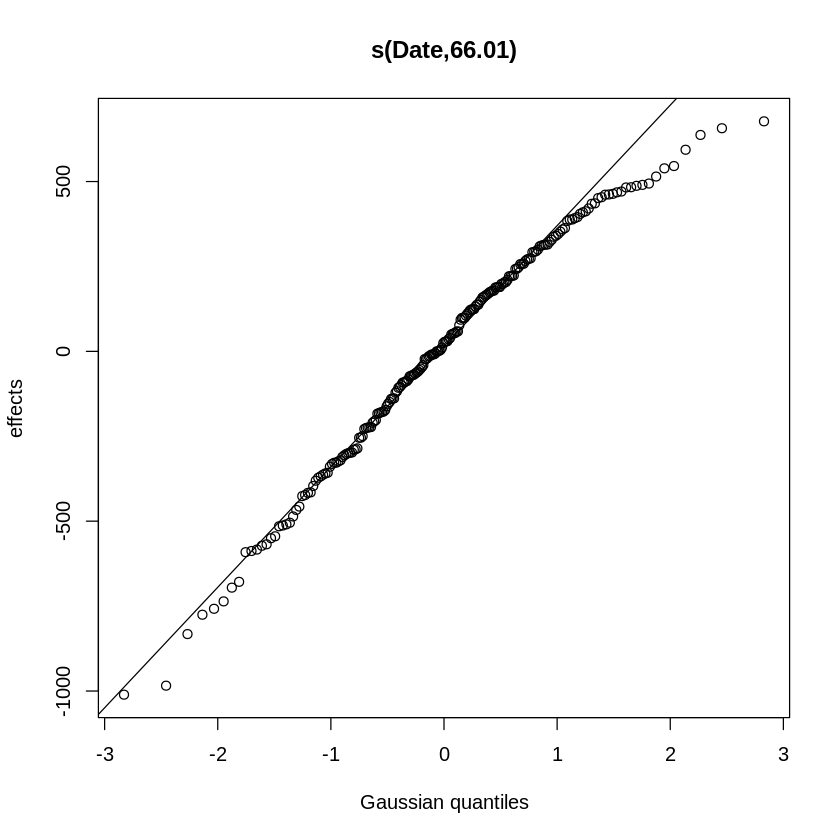

In [81]:
plot(gam_model, terms = c("High.Temp", "Low.Temp", "prec"))

Ans:-
The edf value for the smooth term s(Date) is 82.8, which is much greater than 1. This suggests a strong non-linear relationship between the date variable and the response variable.
---



Q) Evaluate the distribution of the random intercept estimated w.r.t. Date from the plot. Are there large
differences in counts? Do the counts follow a normal distribution?


Ans:- The random intercepts vary widely across dates and do not follow a clear pattern, it suggests large differences in counts across dates

Q) Evaluate predictive accuracy (MSE) of the fitted GAM on the test observations.

In [86]:
predictions <- predict(gam_model, newdata = test_data, type = "response")

mse <- mean((test_data$counts - predictions)^2)

In [87]:
mse

[1] 2439359